### Projeto de Análise de Vendas

Vamos analisar o comportamento das vendas de uma empresa familiar de produção e venda de bolos artesanais.<br> 
Para tal, foi-me entregue a base de dados que se encontra a seguir.

In [1]:
# Configuração do ambiente

# Garante que o notebook está na raiz do projeto
%cd .. 

# Verifica o diretório atual (Linux/Mac)
# !pwd  

# Verifica o diretório atual (Windows)
!cd 

C:\Users\flavi\Documents\GitHub\Projeto_Analise_de_Vendas
C:\Users\flavi\Documents\GitHub\Projeto_Analise_de_Vendas


In [2]:
# Importações necessárias 
import sys
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from src.config.paths import DADOS_BRUTOS_AMOR_CAKES

In [3]:
# Importando a base de dados dadosVenda.xlsx
df_vendas = pd.read_excel(DADOS_BRUTOS_AMOR_CAKES)
df_vendas.head(3)

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
0,1,21.85,23,1.15,81
1,2,4.30,5,0.70,3361
2,3,13.65,15,1.35,1551


In [4]:
# Observando as informações da base
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1634 entries, 0 to 1633
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IDRegistro     1634 non-null   int64  
 1   PrecoVenda     1634 non-null   float64
 2   PrecoOriginal  1634 non-null   int64  
 3   Desconto       1606 non-null   float64
 4   VendaQtd       1634 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 64.0 KB


In [5]:
# Observando os valores nulos presentes em "Desconto"
df_vendas.isnull().sum()

IDRegistro        0
PrecoVenda        0
PrecoOriginal     0
Desconto         28
VendaQtd          0
dtype: int64

In [6]:
# Observando a estatística descritiva da base
df_vendas.describe()

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
count,1634.000000,1634.000000,1634.000000,1606.000000,1634.000000
mean,817.500000,11.152889,13.913097,2.808331,1793.477356
std,471.839485,4.675302,5.422824,2.055469,960.099218
min,1.000000,2.820000,3.000000,0.050000,45.000000
25%,409.250000,7.200000,9.000000,1.140000,995.000000
50%,817.500000,10.920000,14.000000,2.250000,1753.000000
75%,1225.750000,14.520000,19.000000,4.200000,2646.000000
max,1634.000000,23.000000,23.000000,9.200000,3711.000000


In [7]:
# Selecionando os valores nulos da base de dados
df_vendas.loc[df_vendas['Desconto'].isnull()]

,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
18,19,22.0,22,NaN,228
23,24,9.0,9,NaN,2607
45,46,19.0,19,NaN,777
46,47,13.0,13,NaN,1875
64,65,23.0,23,NaN,45
177,178,5.0,5,NaN,3339
327,328,21.0,21,NaN,411
440,441,13.0,13,NaN,1875
452,453,18.0,18,NaN,960
515,516,15.0,15,NaN,1509


### OBSERVAÇÃO:

Podemos observar que esses valores nulos na variável "Desconto", na realidade, referem-se a não aplicação de desconto ao preço original).

In [8]:
# Substituindo os valores NaN pelo valor 0
df_vendas.loc[df_vendas['Desconto'].isnull(), ['Desconto']] = 0

In [9]:
# Certificando que não há mais valores nulos na base
df_vendas.isnull().sum()

IDRegistro       0
PrecoVenda       0
PrecoOriginal    0
Desconto         0
VendaQtd         0
dtype: int64

### Gráfico: Distribuição da Quantidade Vendida

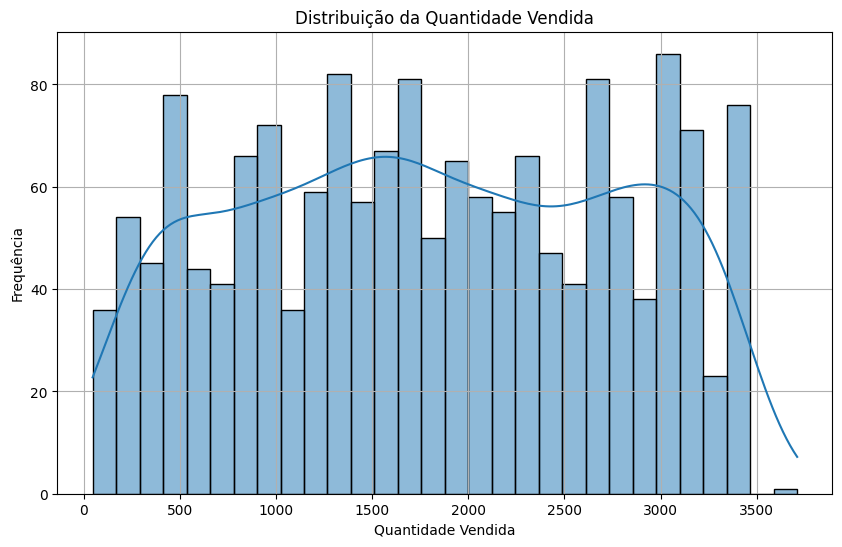

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(df_vendas['VendaQtd'], bins=30, kde=True)
plt.title('Distribuição da Quantidade Vendida')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Frequência')
plt.grid(True)

# Salvar o gráfico como PNG
plt.savefig('img/distribuicao_quantidade_vendida.png')

plt.show()

## Comentários:

O histogrma acima exibe a frequência da quantidade de produtos vndidos por transação, com uma curca de densidade KDE sobreposta para visualizar a distribuição de forma suavizada.

### Padrões Observados:

- **Distribuição Ampla com Múltiplos Picos:** <br>
    A quantidade vendida por transação apresenta uma distribuição extensa, variando de valores próximos a zero até aproximadamente 3500 unidades. Notavelmente, a distribuição não possui um único pico dominante, mas sim múltiplos picos de frequência, indicando concentrações de vendas em diversas faixas de quantidade.<br>
  
- **Picos de Frequência em Faixas Específicas:** <br>
    Observam-se picos de frequeência em torno de:
    - Valores baixos, mas não o mais proeminente.
    - Aproximadamente 500-600 unidades.
    - Uma faixa mais larga entre 1200 e 1600 unidades, onde se localiza o pico de maior frequência, embora distribuído.
    - Ao redor de 2600-3000 unidades.<br><br>
      
- **Vendas de Múltiplas Unidades como Comportamento Comum:** <br>
    A ausência de um pico isolado e massivo na quantidade 1 sugere que as vendas de múltiplas unidades são uma ocorrência frequente no conjunto de dados.

- **Cauda Direita Substancial:** <br>
    Embora a frequência diminua para quantidades muito elevadas, ainda existe um número considerável de transações envolvendo centenas e até milhares de unidades vendidas.

- **Suavização da Distribuição pela Curva KDE:** <br>
    A curva de densidade KDE confirma as áreas de maior concentração de vendas identificadas no histograma, suavizando as variações entre as barras e destacando os múltiplos centros de frequência. <br><br>

---

### Insights e Análises:

- **Diversidade nos Tamanhos dos Pedidos:** <br>
    A presença de múltiplos picos sugere que diferentes tipos de transações ou clientes podem estar envolvidos. Pode haver vendas no varejo de pequenas quantidades, vendas para pequenos negócios em quantidades médias e vendas para grandes clientes ou revendedores em quantidades maiores.<br>
    
- **Identificação de Níveis de Pedido Comuns:** <br>
    As faixas de quantidade com picos de frequência (500-600, 1200-1600, 2600-3000) podem representar níveis de pedidos típicos para certos segmentos de clientes ou para promoções específicas que incentivam a compra nessa quantidade.

- **Importância das Vendas em Volumne:** <br>
    A cauda direita significativa indica que, embora menos frequêntes, as vendas de alto volume contribuem de forma importante para o total de unidades vendidas. Analisar essas transações pode revelar informações cruciais sobre grandes clientes ou pedidos especiais.

- **Necessidade de Estratégias de Vendas Segmentadas:** <br>
    Dada a variedade nos tamanhos dos pedidos, pode ser benéfico desenvolver estratégias de vendas e marketing segmentadas para atender às necessidades de clientes que comprm em diferentes volumes.

- **Investigação dos Motivos por Trás dos Picos:** <br>
    Investigar os fatores que levam aos picos de frequência em quantidades específicas pode fornecer insights valiosos sobre o comportamento do cliente, a eficácia de promoções, ou a natureza dos produtos mais vendidos em diferentes volumes. 

### Gráfico: Relação entre Preço de Venda e Quantidade

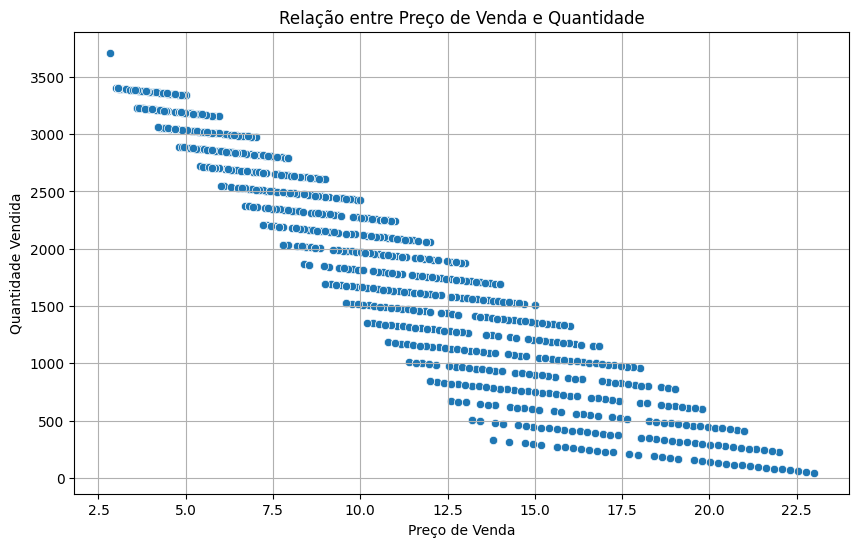

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PrecoVenda', y='VendaQtd', data=df_vendas)
plt.title('Relação entre Preço de Venda e Quantidade')
plt.xlabel('Preço de Venda')
plt.ylabel('Quantidade Vendida')
plt.grid(True)

# Salvar o gráfico como PNG
plt.savefig('img/relacao_preco_venda_quantidade.png')

plt.show()

## Comentários:

Esse gráfico de dispersão examina a relação entre o **preço de venda de um produto** e a **quantidade vendida desse produto na mesma transação.**

### Padrões Observados:

- **Correlação Negativa Clara:** <br>
    Observa-se uma tendência geral negativa, indicando que, à medida que o preço de venda dos produtos aumenta, a quantidade vendida tende a diminuir.

- **Estrutura em "Degraus" ou "Bandas":** <br>
    Os dados se agrupam em faixas horizontais distintas, sugerindo que para certas faixas de preço, a quantidade vendida permanece relativamente estável antes de cair para um patamar inferior em faixas de preços mais elevadas.<br>
    Isso pode indicar **níveis de preço psicológicos** ou **estratégias de precificação específicas**. <br>

- **Maior Volume de Vendas em Preços Mais Baixos:** <br>
    A maior concentração de pontos ocorre na extremidade esquerda do gráfico, revelando que um volume significativo de vendas está associado a **preços de venda mais baixos** e **quantidades relativamente altas**. <br>

- **Variabilidade na Quantidade para Preços Mais Altos:** <br>
    Em contraste, para preços de venda mais altos, a quantidade vendida apresenta **maior dispersão**, indicando uma menor previsibilidade do volume de vendas nesses patamares de preço. 
    As quantidades vendidas para produtos mais caros são geralmente menores. <br>

- **Possível Valor Atípico:** <br>
    Um ponto isolado com um **preço de venda excepcionalmente baixo** e uma **quantidade vendida muito alta** se destaca, sugerindo uma possível **anomalia nos dados** que pode requerer investigação. <br><br>

---

### Insights e Análises:

- **Sensibilidade ao Preço:** <br>
    A correlação negativa sugere que a **demanda pelos produtos é sensível ao preço**. Aumentos no preço de venda podem levar a uma redução no volume de vendas. <br>

- **Estratégias de Precificação por Volume:** <br>
    A estrutura em "degraus" pode refletir estratégias que visam diferentes **segmentos de clientes** ou **níveis de demanda**. <br>
    Analisar os ** limites dessas faixas de preço** pode ser valioso. <br>

- **Foco em Produtos de Menor Preço para Maior Volume:** <br>
    A alta concentração de vendas em preços mais baixos indica que esses produtos impulsionam o maior volume de vendas. <br>
    Estratégias para **otimizar a precificação e disponibilidade** desses produtos podem ser cruciais. <br>

- **Desafios em Vendas de Produtos Mais Caros:** <br>
    A maior variabilidade e as menores quantidades vendidas para preços altos podem indicar um **mercado mais nichado** ou uma **maior sensibilidade a outros fatores** além do preço. <br>

- **Investigação do Valor Atípico:** <br>
    É essencial investigar a natureza da transação representada pelo **valor atípico**. <br>
    Pode ser um erro de entrada de dados, uma promoção especial ou uma venda específica. <br>
    Entender a causa pode fornecer **insights importantes**. 


### Outliers:

Vamos agora investigar os valore atípicos da base.

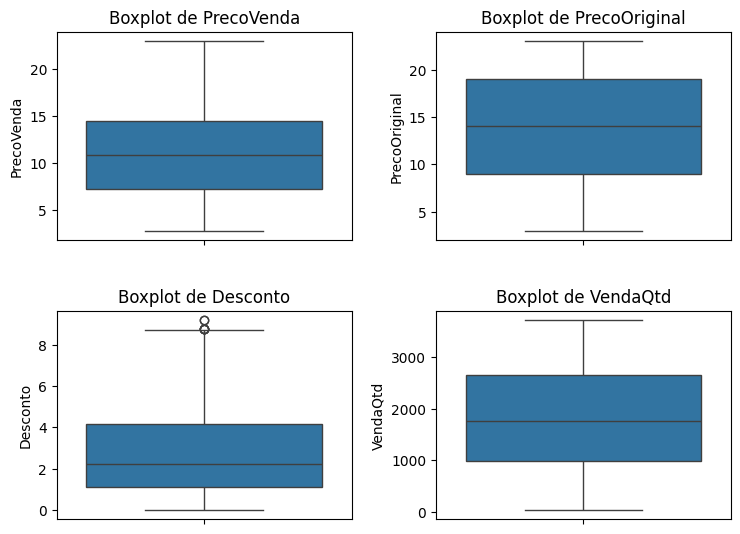

In [18]:
# Defina as colunas para os boxplots
colunas_para_boxplot = ['PrecoVenda', 'PrecoOriginal', 'Desconto', 'VendaQtd']

# Crie a figura e os subplots (2 linhas, 2 colunas)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
fig.tight_layout(pad=3.0) # Ajusta o espaçamento entre os subplots

# Plote os boxplots em cada subplot
sns.boxplot(y=df_vendas[colunas_para_boxplot[0]], ax=axes[0, 0])
axes[0, 0].set_title(f'Boxplot de {colunas_para_boxplot[0]}')
axes[0, 0].set_ylabel(colunas_para_boxplot[0])

sns.boxplot(y=df_vendas[colunas_para_boxplot[1]], ax=axes[0, 1])
axes[0, 1].set_title(f'Boxplot de {colunas_para_boxplot[1]}')
axes[0, 1].set_ylabel(colunas_para_boxplot[1])

sns.boxplot(y=df_vendas[colunas_para_boxplot[2]], ax=axes[1, 0])
axes[1, 0].set_title(f'Boxplot de {colunas_para_boxplot[2]}')
axes[1, 0].set_ylabel(colunas_para_boxplot[2])

sns.boxplot(y=df_vendas[colunas_para_boxplot[3]], ax=axes[1, 1])
axes[1, 1].set_title(f'Boxplot de {colunas_para_boxplot[3]}')
axes[1, 1].set_ylabel(colunas_para_boxplot[3])

# Salvar o gráfico como PNG
plt.savefig('img/visualizando_outliers.png')

plt.show()

### Observação: 

Observamos que os outliers estão na variável 'Desconto'.

In [13]:
# Cálculo do IQR
q1 = df_vendas['Desconto'].quantile(0.25)
q3 = df_vendas['Desconto'].quantile(0.75)
iqr = q3 - q1

# Limites para detectar outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

# Selecionar os outliers
outliers_desconto = df_vendas[
    (df_vendas['Desconto'] < limite_inferior) |
    (df_vendas['Desconto'] > limite_superior)
]

# Exibir resultado
print(f"Número de outliers encontrados: {outliers_desconto.shape[0]}")
outliers_desconto.head()

Número de outliers encontrados: 7


,IDRegistro,PrecoVenda,PrecoOriginal,Desconto,VendaQtd
269,270,13.8,23,9.2,330
352,353,13.2,22,8.8,501
449,450,13.2,22,8.8,501
746,747,13.8,23,9.2,330
781,782,13.2,22,8.8,501


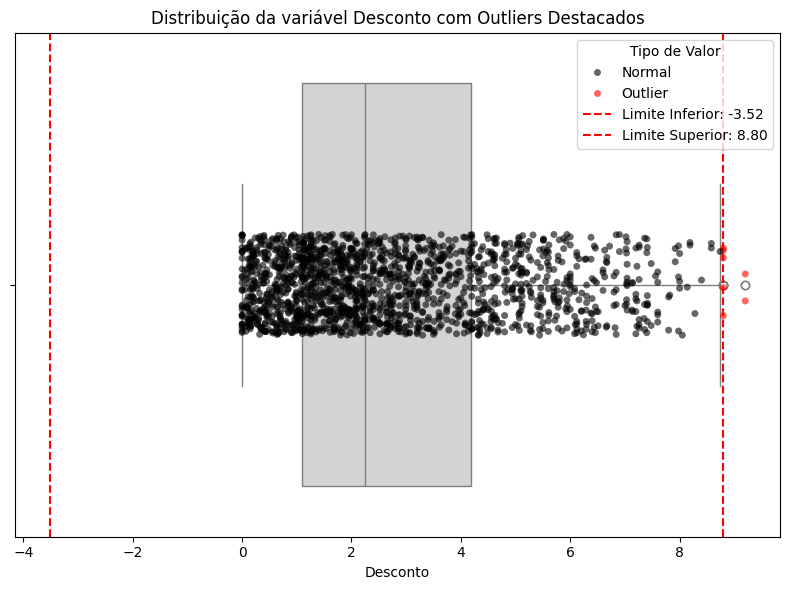

In [19]:
# Coluna auxiliar para destacar os outliers
df_vendas['OutlierDesconto'] = df_vendas['Desconto'].apply(
    lambda x: 'Outlier' if (x < limite_inferior or x > limite_superior) else 'Normal'
)

# Plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_vendas, x='Desconto', color='lightgray')
sns.stripplot(data=df_vendas, x='Desconto', hue='OutlierDesconto',
              palette={'Outlier': 'red', 'Normal': 'black'},
              size=5, jitter=True, alpha=0.6)

# Linhas de corte (limites de outliers)
plt.axvline(limite_inferior, color='red', linestyle='--', label=f'Limite Inferior: {limite_inferior:.2f}')
plt.axvline(limite_superior, color='red', linestyle='--', label=f'Limite Superior: {limite_superior:.2f}')

# Título e legenda
plt.title('Distribuição da variável Desconto com Outliers Destacados')
plt.legend(title='Tipo de Valor', loc='upper right')
plt.tight_layout()

# Salvar o gráfico como PNG
plt.savefig('img/distribuicao_variavel_descontos_com_outliers.png')

plt.show()

### Conclusão:

Podemos observar que há 7 outliers na variável 'Desconto'. Notamos que desconto a partir de 8.8 é outlier. <br>
Conversando com a empresa descobri que tais valores referen-se a promoções especiais e, que portanto, deve fazer parte da análise. 

### Gráfico: Distribuição dos Preços de Venda

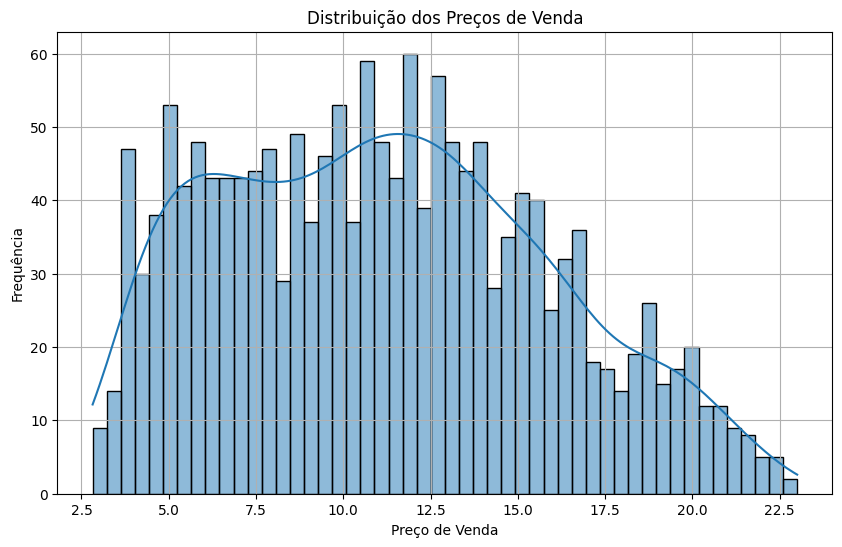

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df_vendas['PrecoVenda'], bins=50, kde=True)
plt.title('Distribuição dos Preços de Venda')
plt.xlabel('Preço de Venda')
plt.ylabel('Frequência')
plt.grid(True)

# Salvar o gráfico como PNG
plt.savefig('img/distribuicao_preco_venda.png')

plt.show()

## Comentários:

Esse histograma exibe a frequência dos diferentes preços de venda registrados nas transações, com um curva de densidade KDE sobreposta para estimar a distribuição subjacente dos preços.

### Padrões Observados:

- **Distribuição Assimétrica à Direita:** <br>
    A distribuição de preços de venda apresenta uma leve assimetria à direita, indicando que, embora a maioria das vendas se concentre em preços mais baixos, existem algumas transações com preços consideravelmente mais altos. <br>

- **Pico Principal em Faixa de Preço Intermediária:** <br>
    O pico de maior frequência de vendas ocorre na faixa de preço de aproximadamente 11 a 12, sugerindo que essa é a faixa de preço mais comum para os produtos comercializados. <br>

- **Presença de Picos Secundários:** <br>
    Observam-se picos de frequência secundários em faixas de preço mais baixas, como por volta de 5-6 e 8-9. Esses picos podem indicar a existência de diferentes categoria de produtos com estratégias de preço distintas ou diferentes níveis de demanda em certas faixas de preço. <br>

- **Confirmação da Distribuição pela Curva KDE:** <br>
    A curva de densidade KDE suaviza a distribuição do histograma, reforçando a identificação do pico principal e dos picos secundários, e fornecendo uma visão mais clara da concentração dos preços de venda. <br>

- **Tendência de Frequência Decrescente com Preços Mais Altos:** <br>
    De maneira geral, a frequência de vendas tende a diminuir à medida que o preço de venda aumenta, particularmente após a faixa de rpeço de maior ocorrência. <br><br>

--- 

### Insghts e Análise: 

- **Estratégia de Preços Predominante:** <br>
    A faixa de preço com o pico principal (11-12) provavelmente representa a estratégia de preços mais comum ou o segmento de produtos com maior volume de vendas. <br>

- **Segmentação de Produtos por Preço:** <br>
    Os múltimplos picos podem indicar uma segmentação de produtos por faixa de preço, atendendo a diferentes sensibilidades ao preço ou oferecendo diferentes níveis de valor. Analizar as características dos produtos em cada pico pode ser informativo. <br>

- **Potencial para Aumentar Vendas em Faixas de Preço Mais Altas:** <br>
    A menor frequência de vendas em preços mais altos pode indicar uma oportunidade para estratégias de marketing ou promoções direcionadas a aumentar o volume nessas faixas, caso a margem de lucro compense o menor volume. <br>

- **Análise de Sensibilidade de Preço:** <br>
    A queda na frequência com o aumento do preço reforça a ideia de que os clientes são sensíveis ao preço. <br>
    Entender a elasticidade da demanda em diferentes faixas de preço pode ajudar na definição de preços ótimos. <br>

- **Comparação com Custos:** <br>
    Para uma análise mais completa, seria interessante comparar essa distribuição de preços de venda com a distribuição dos custos dos produtos para entender as margens de lucro em diferentes faixas de preço.

### Gráfico: Relação entre Preço Original e Preço de Venda 

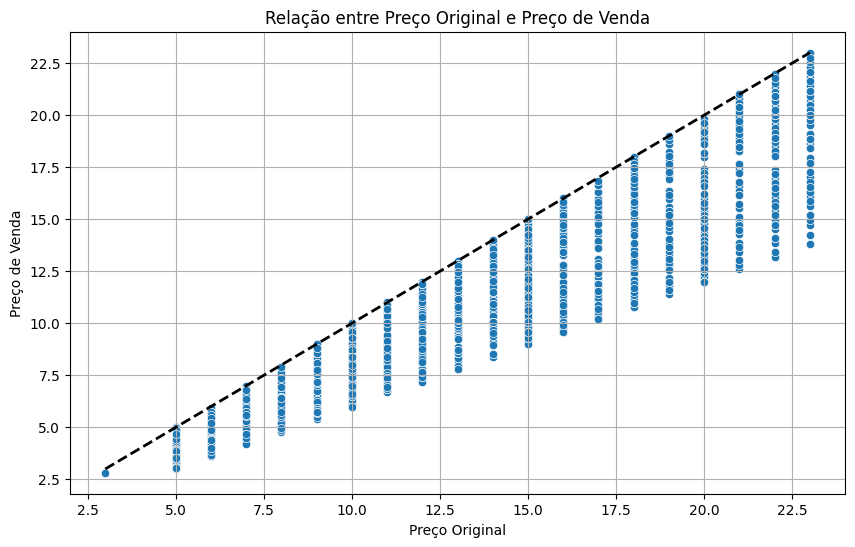

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PrecoOriginal', y='PrecoVenda', data=df_vendas)
plt.plot([df_vendas['PrecoOriginal'].min(), df_vendas['PrecoOriginal'].max()],
         [df_vendas['PrecoOriginal'].min(), df_vendas['PrecoOriginal'].max()],
         'k--', linewidth=2) # Linha de referência para Preço Original = Preço Venda
plt.title('Relação entre Preço Original e Preço de Venda')
plt.xlabel('Preço Original')
plt.ylabel('Preço de Venda')
plt.grid(True)

# Salvar o gráfico como PNG
plt.savefig('img/relacao_preco_original_venda.png')

plt.show()

## Comentários:

Este gráfico de dispersão compara o preço original dos produtos com o preço pelo qual eles foram efetivamente vendidos. A linha trecejada diagonal representa o cenário onde o preço de venda é igual ao preço original (sem desconto). 

### Padrões Observados: 

- **Prevalência de Vendas com Desconto:** <br>
    A vasta maioria dos pontos se encontra abaixo da linha de referência, indicando que a grande maioria das vendas é realizada com um preço inferior ao preço original, evidenciando uma estratégia de descontos amplamente utilizada. <br>

- **Correlação Positiva entre Preços:** <br>
    Apesar dos descontos, existe uma correlação positiva entre o preço original e o preço de venda. Produtos comm preços originais mais altos tendem a ter preços de venda também mais altos, embora com um desonto aplicado. <br>

- **Variação nos Níveis de Desconto:** <br>
    Para um determinado preço original, observa-se uma dispersão vertical de preços de venda, o que demonstra que a magnitude do desconto aplicado varia significativamente entre as transações. <br>

- **Agrupamentos de Preços de Venda por Preço Original:** <br>
    Os pontos tendem a se agrupar verticalmente para faixas estreitas de preço original, sugerindo que certos níveis de desconto são mais comuns para produtos com preços originais semelhantes. <br>

- **Ocorrência de Descontos Mínimos ou Ausentes:** <br>
    Alguns pontos próximos ou ligeiramente acima da linha tracejada indicam vendas com descontos muito pequenos ou até mesmo um preço de venda marginalmente superior ao original, o que pode ser resultado de arredondamentos, erros de entrada de dados ou condições de venda especiais. <br><br>

---

### Insights e Análises: 

- **Estratégia de Descontos Ativa:** <br>
    A predominância de pontos abaixo da linha reforça a ideia de que a estratégia de descontos é uma parte central da política de vendas. <br>

- **Descontos não Uniformes:** <br>
    A variabilidade nos descontos sugere que diferentes fatores podem influenciar a magnitude do desconto aplicado, como promoções específicas, tempo de compra, cliente ou produto. Analizar esses fatores poderia otimizar a estratégia de descontos. <br>

- **Potencial apra Otimização de Preços:** <br>
    Entender a relação entre o preço original e a distribuição dos preços de venda pode ajudar a identificar oportunidades para ajustar os preços originais ou a política de descontos para maximizar a receita e a margem de lucro. <br>

- **Investigação de Casos de Desconto Mínimo/Ausente:** <br>
    Analisar as transações com descontos mínimos ou preços de venda superiores ao original pode revelar informações sobre produtos com alta demanda, erros de precificação ou oportunidades de aumentar os preços em certos casos. <br>

- **Avaliação do Impacto dos Descontos:** <br>
    Quantificar a diferença média entre o preço original e o preço de venda pode fornecer uma visão geral do impacto financeiro da estratégia de descontos. 

### Gráfico: Distribuição do Valor do Desconto 

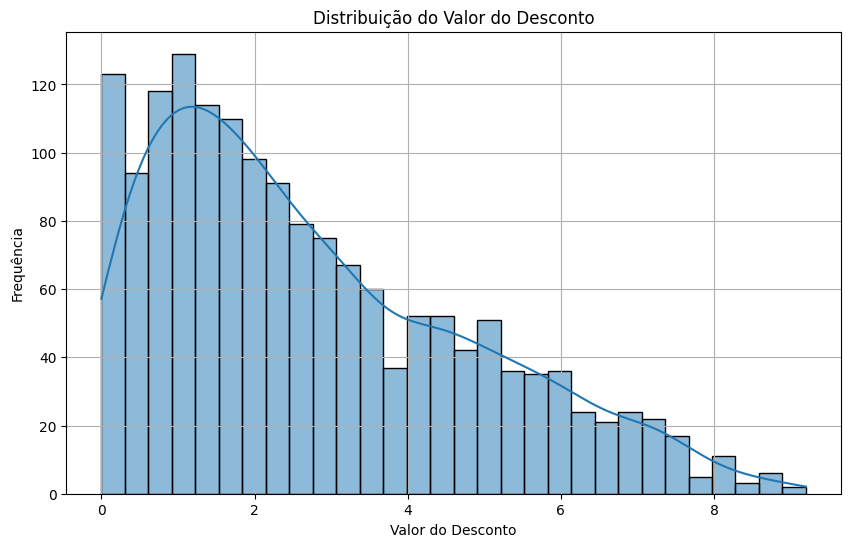

In [17]:
plt.figure(figsize=(10, 6))
sns.histplot(df_vendas['Desconto'], bins=30, kde=True)
plt.title('Distribuição do Valor do Desconto')
plt.xlabel('Valor do Desconto')
plt.ylabel('Frequência')
plt.grid(True)

# Salvar o gráfico como PNG
plt.savefig('img/distribuicao_valor_desconto.png')

plt.show()

## Comentários:

Este histograma axibe a frequência dos diferentes valores de desconto aplicados nas transações, com uma curva de densidade KDE sobreposta para visualizar a distribuição.

### Padrões Obervados:

- **Forte Assimetria à Direita:** <br>
    A distribuição do valor do desconto é fortemente assimétrico à direita, indicando que a maioria das transações envolve valores de desconto baixos. <br>

- **Pico de Frequência em Descontos Próximos a Zero:** <br>
    A maior frequência de ocorrência de descontos está em valores muito próximos de zero, sugerindo que muitos produtos são vendidos com pouco ou nenhum desconto. <br>

- **Decaimento Rápido da Frequência com o Aumento do Desconto:** <br>
    A frequência de descontos diminui acentuadamente à medida que o valor do desconto aumenta, mostrando que descontos maiores são menos comuns. <br>
- **Picos Secundários em Valores de Descontos Maiores:** <br>
    Observam-se picos secundários de menor frequência em valores de desconto mais altos (por exemplo, em torno de 4-5 e 6-7), o que pode indicar níveis de desconto padronizados para promoções ou categorias de produtos específicas. <br>

- **Presença de Descontos Significativos (Cauda Longa):** <br>
    A cauda longa da distribuição revela que, embora raros em comparação com descontos menores, descontos de valores consideráveis são ocasionalmente aplicados. <br>

- **Suavização da Distribuição pela Curva KDE:** <br>
    A curva de densidade KDE confirma a forte concentração de descontos em valores baixos e o declínio gradual na frequência de descontos maiores, facilitando a visualização da tendência geral. <br><br>

--- 

### Insights e Análise: 

- **Estratégia de Descontos Conservadora:** <br>
    A alta frequência de descontos próximos a zero sugere uma estratégia de descontos relativamente conservadora, onde a maioria das vendas ocorre com pequenos ou nenhum abatimento no preço original. <br>

- **Promoção ou Descontos Específicos:** <br>
    Os picos secundários em valores de desconto mais altos podem indicar a presença de promoções específicas que oferencem esses níveis de desconto ou descontos aplicados a categorias de produtos selecionadas. Investigar quais produtos estão associados a esses valores de desconto pode ser valioso. <br>

- **Impacto dos Descontos na Receita:** <br>
    Analizar a distribuição do valor do desconto em conjunto com o volume de vendas em cada faixa de desconto pode ajudar a quantificar o impacto financeiro total da estratégia de descontos na receita. <br>

- **Oportunidades de Ogimização de Descontos:** <br>
    Entender a frequência e a magnitude dos descontos pode revelar oportunidades para otimizar a política de descontos, garantindo que os descontos oferecidos sejam eficazes em impulsionar as vendas sem erodir excessivamente as margens de lucro. <br>

- **Análise de Custo/Benefício dos Descontos:** <br>
    Avaliar se os aumentos no volume de vendas resultantes de descontos maiores compensam a redução no preço unitário é crucial para uma estratégia de preços eficaz. 